Data Description: Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 


Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

*    Steps and Milestones (100%):

*    Setup Environment and Load Necessary Packages (5%)

*   Data Preparation (40%)
*   Loading Data (5%)
*   Cleaning Data (10%)
*   Data Representation & Feature Engineering (If Any) (15%)
*   Creating Train and Validation Set (10%)

*    Model Creation (30%)
*    Write & Configure Model (10%)
*    Compile Model (10%)
*    Build Model & Checking Summary (10%)

*    Training and Evaluation (25%)
*    Run Multiple Experiments (10%)
*    Reason & Visualize Model Performance (5%)
*    Evaluate Model on Test Set (10%)

Learning Outcomes:
*    Neural Networks for Predictive Analytics
*    Fine-tuning Model
*    Data Preparation
*    Feature Engineering
*    Visualization
 

The points distribution for this case is as follows:

1.   Read the data set
2.   Drop the columns which are unique for all users like IDs (2.5 points)
3.   Distinguish the feature and target set (2.5 points)
4.   Divide the data set into training and test sets ( 2.5 points)
5.   Normalize the train and test data (5 points)
6.   Initialize & build the model (10 points)
7.   Predict the results using 0.5 as a threshold (5 points)
8.   Print the Accuracy score and confusion matrix (2.5 points)


Installing scikit learn 0.22

In [0]:
#!pip install scikit-learn==0.22.0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

import os
#print(os.listdir("../input"))

###Data Preparation 

In this dataset, the information about a customer is given in columns 0 to 12 and the desired output is stored in the 13th (last column) of the dataset. Neither the customer ID, nor the Surname will matter in classification, therefore to reduce the dimensions, we will use columns 3 (CreditScore) inclusive through the 13th column for the analysis.






In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
#importing the dataset

bankdataset = pd.read_csv('/content/drive/My Drive/colab notebooks /Deep Learning and NN/bank.csv', index_col='RowNumber')
bankdataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [220]:
X_columns = bankdataset.columns.tolist()[2:12]
y_columns = bankdataset.columns.tolist()[-1:]
print(f'All columns: {bankdataset.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


### Distinguishing the feature and target set in the data

In [0]:
X = bankdataset[X_columns].values # All columns from Credit Score to Estimated Salary are taken as inputs
y = bankdataset[y_columns].values # desired output : whether customer exited or not ?

In [0]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
#print(X[:8,1], '... will be encoded to: ')
from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
#print(X[:8,1])

In [0]:
# We will do the same thing for gender. this will be binary in this dataset
#print(X[:6,2], '... will be encoded to: ')
from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
#print(X[:6,2])

Feature engineering is the most important aspect of creating an effective model. When dealing with categorical features, a common convention is to drop one of the one-hot encoded columns from each feature. 

First 3 columns represent the 3 countries(France, Spain and Germany) that constituted the "country" category variable. Now, observe that we essentially need only two columns: a 0 on two countries means that the country has to be the one variable which wasn't included, this will save us from the problem of using too many dimensions. This encoding can be achieved using the `drop='first'` option in the OneHotEncoder

|1|0|0|-> |0|0|
|0|1|0|-> |1|0|
|0|1|0|-> |1|0|
|0|0|1|-> |0|1|



Feature scaling is a method used to standardize the range of independent variables or features of data set. Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.[


Pipeline perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator.



In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [0]:
X = pipeline.fit_transform(X)

In [0]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [227]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


Nueral Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
# Initializing the ANN
classifier = Sequential()

Determining the amount of nodes (dimensions) in the hidden layer can be any value between in the range of no. of dimensions, since we are going to implement / explore the deep learning, let's consider 6 nodes for the first layer.

The breakdown of the inputs for the first layer is as follows:

`units`: `6` nodes (number of nodes in hidden layer). Can think of this as number of nodes are in the next layer.

`activiation`: `relu` becasue we are in an input layer. uses the ReLu activation function for the layer. This is equivalent to $max(0, W \times x^T + b)$

`input_dim`: `11` because we span 11 dimensions in our input layer. This is needed for the first added layer. The subsequent layers's input dimensions can be inferred using the previously added layer's output dimension. The next hidden layer will know what to expect.




In [0]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(3, activation = 'relu', input_shape = (X_train.shape[1], )))
#classifier.add(Dropout(rate=0.1)) 

Having Second hidden layer to this model to implement Deep Learning, which is an artificial Neural network with many layers. The second hidden layer also have 6 nodes.

In [0]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(3, activation = 'relu')) 
#classifier.add(Dropout(rate=0.1)) 

Output layer
#### The breakdown of the inputs for the output layer is as follows:

*activiation*: **sigmoid** - output layer uses the Sigmoid activation function for $\phi$. This is used instead of the ReLu function becasue it generates probabilities for the outcome and we want to know the probability that each customer leaves the bank.  

`units`: `6` nodes (number of nodes in hidden layer). 

`input_dim`: `11` because we span 11 dimensions in our input layer. This is needed for the first added layer. The subsequent layers's input dimensions can be inferred using the previously added layer's output dimension. The next hidden layer will know what to expect.


In [0]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

Note : If the output needs to have more than two categories, then we will need to change 

 1) the *units* parameter to match the desired category count
 
 2) the *activation* field to **softmax**.  Basically a sigmoid function but applied to a dependent variable that has more than 2 categories.

In [233]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 3)                 36        
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


Compiling the Neural Network

Applying Stochastic Gradient descent on the whole Neural Network, tuning the individual weights on each neuron.

The breakdown of the inputs for compiling is as follows:

`optimizer`: `adam` The algorithm used to find the optimal set of weights in the neural networks, adam is a variation of Stochastic Gradient Descent.

`loss`: `binary_crossentropy` This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is `Binary`, it is `binary_crossentropy`. If `Categorical`, then it is called `categorical_crossentropy`

`metrics`: `[accuracy]` The accuracy metrics which will be evaluated(minimized) by the model. Used as accuracy criteria to improve model performance.

In [0]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])

The breakdown of the inputs for compiling is as follows:

`X_train` The independent variable portion of the data which needs to be fitted with the model.

`Y_train` The output portion of the data which the model needs to produce after fitting.

`batch_size`:  How often we want to back-propogate the error values so that individual node weights can be adjusted. 

`epochs`: The number of times we want to run the entire test data over again to tune the weights. This is like the fuel of the algorithm. 


`validation_split`: `0.2` The fraction of data to use for validation data. 


In [235]:
history = classifier.fit(X_train, y_train, batch_size=1000, epochs=200, validation_split=0.1, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
 - 1s - loss: 1.0059 - acc: 0.3125 - val_loss: 0.9882 - val_acc: 0.3162
Epoch 2/200
 - 0s - loss: 0.9794 - acc: 0.3181 - val_loss: 0.9615 - val_acc: 0.3275
Epoch 3/200
 - 0s - loss: 0.9535 - acc: 0.3264 - val_loss: 0.9363 - val_acc: 0.3363
Epoch 4/200
 - 0s - loss: 0.9290 - acc: 0.3390 - val_loss: 0.9127 - val_acc: 0.3500
Epoch 5/200
 - 0s - loss: 0.9065 - acc: 0.3485 - val_loss: 0.8910 - val_acc: 0.3638
Epoch 6/200
 - 0s - loss: 0.8854 - acc: 0.3578 - val_loss: 0.8711 - val_acc: 0.3738
Epoch 7/200
 - 0s - loss: 0.8663 - acc: 0.3654 - val_loss: 0.8527 - val_acc: 0.3812
Epoch 8/200
 - 0s - loss: 0.8486 - acc: 0.3767 - val_loss: 0.8356 - val_acc: 0.3938
Epoch 9/200
 - 0s - loss: 0.8322 - acc: 0.3865 - val_loss: 0.8198 - val_acc: 0.3963
Epoch 10/200
 - 0s - loss: 0.8167 - acc: 0.4006 - val_loss: 0.8052 - val_acc: 0.4062
Epoch 11/200
 - 0s - loss: 0.8025 - acc: 0.4142 - val_loss: 0.7915 - val_acc: 0.4200
Epoch 12/200
 - 0s - loss: 

The output network should converge to an accuracy of around 79%


Testing the NN
Predicting the Test Set results

This shows the probability of a customer leaving given the testing data. Each row in X_test corresponds to a row in Y_test

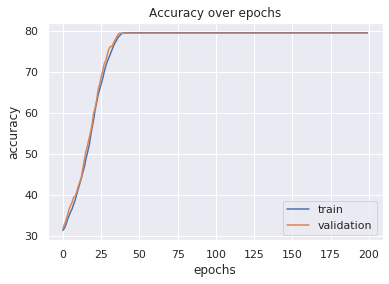

In [236]:
plt.plot(np.array(history.history['acc']) * 100)
plt.plot(np.array(history.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [237]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.26004136]
 [0.31866312]
 [0.21305808]
 [0.08393621]
 [0.20702416]]


Predict the results using 0.5 as a threshold.

In [238]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


Printing the accuracy score and the Confusion Matrix

In [239]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


In [240]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of test data about the customers leaving the bank is classified correctly')

79.75 % of test data about the customers leaving the bank is classified correctly
